# Hilo GeoJson Exploration for Yelp API Scrape

In [88]:
#opening libraries
import pandas as pd
import json
import geopandas as gpd


with open('../data/boundaries/hilo.geojson') as f:
    hilo = json.load(f)


fname = '../data/boundaries/hilo.geojson'
hilo_gpd = gpd.read_file(fname)

### Using Shapely LineString

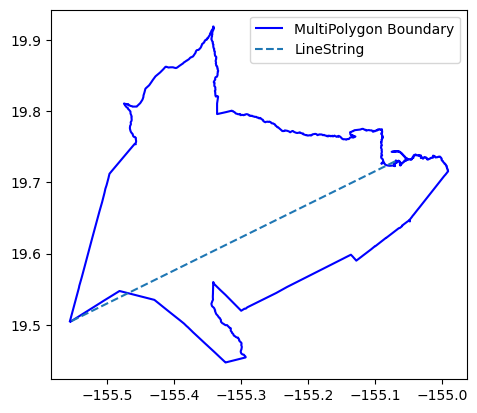

In [104]:
from shapely.geometry import LineString, MultiPolygon
import matplotlib.pyplot as plt
import geopandas as gpd


#### example 


#took random points from file
line_coordinates = [(-155.552627, 19.505175), (-155.0687025, 19.730062)]

#made a line
line = LineString(line_coordinates)

#plot line and shape
fig, ax = plt.subplots()

hilo_gpd['geometry'].boundary.plot(ax=ax, color='blue', label='MultiPolygon Boundary')

x, y = line.xy
ax.plot(x, y, label='LineString', linestyle='dashed')

plt.legend()
plt.show()



We could iterate through x,y points and every n amount of steps we could draw a line so that we get a grid, then we could get each of the intersections of the lines and save them for Yelp.

### Using Shapely Linear Ring

https://shapely.readthedocs.io/en/stable/reference/shapely.LinearRing.html

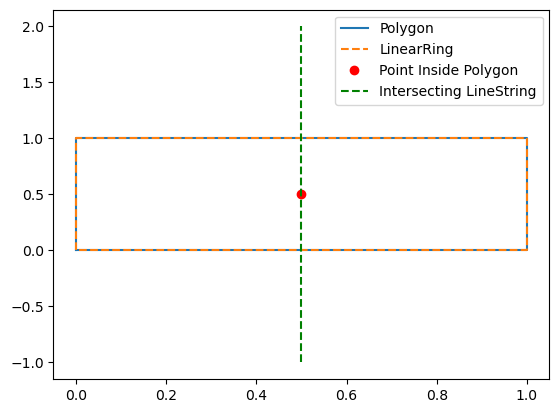

In [107]:
from shapely.geometry import Polygon, LinearRing, LineString
import matplotlib.pyplot as plt

# Example LinearRing coordinates, 4 coordinates makes a box , the more coordinates the closer to circle

linear_ring_coords = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]

# Create a LinearRing
linear_ring = LinearRing(linear_ring_coords)

# Create a Polygon using the LinearRing
polygon = Polygon(linear_ring)

# Plot the Polygon and LinearRing
fig, ax = plt.subplots()

x, y = polygon.exterior.xy
ax.plot(x, y, label='Polygon')

x, y = linear_ring.xy
ax.plot(x, y, label='LinearRing', linestyle='dashed')

# Check if a point is inside the Polygon
point_to_check = Point(0.5, 0.5)
if polygon.contains(point_to_check):
    x, y = point_to_check.xy
    ax.plot(x, y, 'o', label='Point Inside Polygon', color='red')

# Check if a LineString intersects with the Polygon
line_to_check = LineString([(0.5, -1), (0.5, 2)])
if polygon.intersects(line_to_check):
    x, y = line_to_check.xy
    ax.plot(x, y, label='Intersecting LineString', linestyle='dashed', color='green')

plt.legend()
plt.show()


### Shapely Box

https://shapely.readthedocs.io/en/stable/reference/shapely.box.html

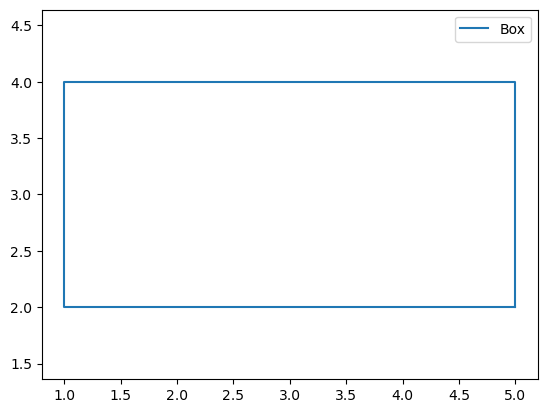

In [108]:
from shapely.geometry import box
import matplotlib.pyplot as plt

# Example: Create a box with coordinates (minx, miny, maxx, maxy)
minx, miny, maxx, maxy = (1, 2, 5, 4)
rectangle = box(minx, miny, maxx, maxy)

# Plot the box
fig, ax = plt.subplots()
x, y = rectangle.exterior.xy
ax.plot(x, y, label='Box')

plt.legend()
plt.axis('equal')
plt.show()


## more with shapely linear ring

In [111]:
for coordinate in hilo['coordinates']:
    print(coordinate)

[[[-155.555413, 19.503474], [-155.552627, 19.505175], [-155.551775, 19.505635], [-155.551101, 19.506111], [-155.548408, 19.507725], [-155.546935, 19.50861], [-155.5449896, 19.5097477], [-155.542655, 19.511113], [-155.5422493, 19.5113533], [-155.5398151, 19.512795], [-155.5394093, 19.5130354], [-155.5380146, 19.5138614], [-155.5377865, 19.5139965], [-155.5353523, 19.5154382], [-155.5345408, 19.5159188], [-155.531295, 19.517841], [-155.5308892, 19.5180814], [-155.5288608, 19.519283], [-155.5284551, 19.5195233], [-155.5280494, 19.5197636], [-155.5276436, 19.520004], [-155.5260045, 19.520975], [-155.5256151, 19.5212056], [-155.5239924, 19.5221668], [-155.5227751, 19.5228878], [-155.519935, 19.52457], [-155.5195147, 19.524819], [-155.5191235, 19.5250507], [-155.515878, 19.5269733], [-155.5154719, 19.5272138], [-155.5142551, 19.5279346], [-155.5135074, 19.5283775], [-155.5097922, 19.530578], [-155.508575, 19.531299], [-155.5081873, 19.5315349], [-155.5050861, 19.5334217], [-155.5043213, 19.5

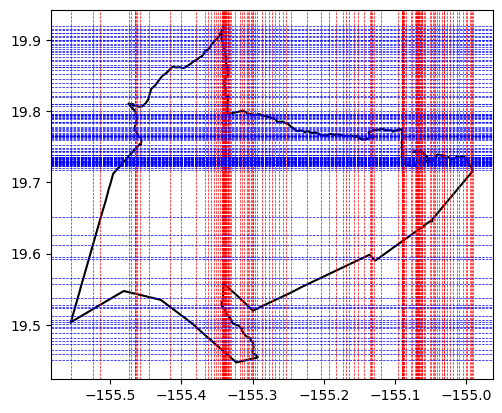

In [125]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_with_steps(geojson_file, step):
    with open(geojson_file, 'r') as file:
        geojson_data = json.load(file)

    fig, ax = plt.subplots()

    for polygon_coordinates in geojson_data['coordinates']:
        # Assuming the first set of coordinates is for the exterior ring
        exterior_coords = np.array(polygon_coordinates[0])
        ax.plot(exterior_coords[:, 0], exterior_coords[:, 1], color='black')

        # Plot vertical lines with steps
        x_coordinates = exterior_coords[:, 0]
        for i in range(0, len(x_coordinates), step):
            ax.axvline(x=x_coordinates[i], color='red', linestyle='--', linewidth=0.5)

        # Plot horizontal lines with steps
        y_coordinates = exterior_coords[:, 1]
        for i in range(0, len(y_coordinates), step):
            ax.axhline(y=y_coordinates[i], color='blue', linestyle='--', linewidth=0.5)

    ax.set_aspect('equal')
    plt.show()

# Replace 'your_geojson_file.geojson' with the actual file path
# Set 'step' to the desired interval between lines
plot_grid_with_steps('../data/boundaries/hilo.geojson', step=30)


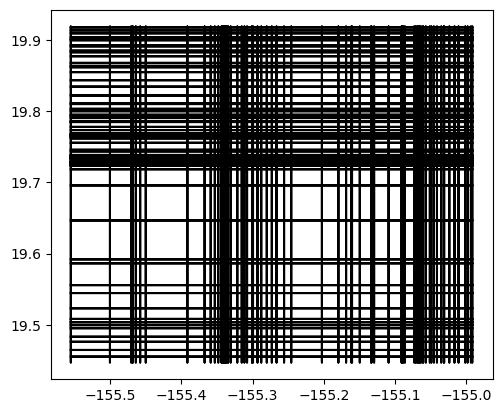

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

def plot_grid_with_steps_and_save(geojson_file, step, save_file=None):
    with open(geojson_file, 'r') as file:
        geojson_data = json.load(file)

    line_strings = []

    for polygon_coordinates in geojson_data['coordinates']:
        # Assuming the first set of coordinates is for the exterior ring
        exterior_coords = np.array(polygon_coordinates[0])

        # Plot vertical lines with steps
        x_coordinates = exterior_coords[:, 0]
        for i in range(0, len(x_coordinates), step):
            line = LineString([(x_coordinates[i], y) for y in exterior_coords[:, 1]])
            line_strings.append(line)

        # Plot horizontal lines with steps
        y_coordinates = exterior_coords[:, 1]
        for i in range(0, len(y_coordinates), step):
            line = LineString([(x, y_coordinates[i]) for x in exterior_coords[:, 0]])
            line_strings.append(line)

    if save_file:
        # Save LineString geometries to a GeoJSON file
        features = [{"type": "Feature", "geometry": ls.__geo_interface__} for ls in line_strings]
        output_geojson = {"type": "FeatureCollection", "features": features}
        with open(save_file, 'w') as output_file:
            json.dump(output_geojson, output_file)

    # Plotting (unchanged)
    fig, ax = plt.subplots()
    for line in line_strings:
        ax.plot(*line.xy, color='black')

    ax.set_aspect('equal')
    plt.show()


# Set 'step' to the desired interval between lines
plot_grid_with_steps_and_save('../data/boundaries/hilo.geojson', step=50)


In [1]:
import json
import numpy as np
from shapely.geometry import LineString, MultiLineString, Point

def find_intersections(geojson_file, step):
    with open(geojson_file, 'r') as file:
        geojson_data = json.load(file)

    line_strings = []

    for polygon_coordinates in geojson_data['coordinates']:
        # Assuming the first set of coordinates is for the exterior ring
        exterior_coords = np.array(polygon_coordinates[0])

        # Create LineString geometries for vertical lines
        x_coordinates = exterior_coords[:, 0]
        for i in range(0, len(x_coordinates), step):
            line = LineString([(x_coordinates[i], y) for y in exterior_coords[:, 1]])
            line_strings.append(line)

        # Create LineString geometries for horizontal lines
        y_coordinates = exterior_coords[:, 1]
        for i in range(0, len(y_coordinates), step):
            line = LineString([(x, y_coordinates[i]) for x in exterior_coords[:, 0]])
            line_strings.append(line)

    # Create a MultiLineString from the LineString geometries
    multi_line = MultiLineString(line_strings)

    # Find intersections
    intersections = multi_line.intersection(multi_line)

    # Extract intersection coordinates
    intersection_coords = []
    for line in multi_line.geoms:
        if isinstance(line, LineString):
            for point in line.coords:
                intersection_coords.append((point[0], point[1]))

    return intersection_coords

# Replace 'your_geojson_file.geojson' with the actual file path
# Set 'step' to the desired interval between lines
intersection_coordinates = find_intersections('../data/boundaries/hilo.geojson', step=50)


In [2]:
intersection_coordinates

[(-155.555413, 19.503474),
 (-155.555413, 19.505175),
 (-155.555413, 19.505635),
 (-155.555413, 19.506111),
 (-155.555413, 19.507725),
 (-155.555413, 19.50861),
 (-155.555413, 19.5097477),
 (-155.555413, 19.511113),
 (-155.555413, 19.5113533),
 (-155.555413, 19.512795),
 (-155.555413, 19.5130354),
 (-155.555413, 19.5138614),
 (-155.555413, 19.5139965),
 (-155.555413, 19.5154382),
 (-155.555413, 19.5159188),
 (-155.555413, 19.517841),
 (-155.555413, 19.5180814),
 (-155.555413, 19.519283),
 (-155.555413, 19.5195233),
 (-155.555413, 19.5197636),
 (-155.555413, 19.520004),
 (-155.555413, 19.520975),
 (-155.555413, 19.5212056),
 (-155.555413, 19.5221668),
 (-155.555413, 19.5228878),
 (-155.555413, 19.52457),
 (-155.555413, 19.524819),
 (-155.555413, 19.5250507),
 (-155.555413, 19.5269733),
 (-155.555413, 19.5272138),
 (-155.555413, 19.5279346),
 (-155.555413, 19.5283775),
 (-155.555413, 19.530578),
 (-155.555413, 19.531299),
 (-155.555413, 19.5315349),
 (-155.555413, 19.5334217),
 (-155.555

In [ ]:
#now that we have the coordinates, we can use them to iterate through the yelp api